In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
from geopy.distance import vincenty
from matplotlib import ticker
from NFLFunctions import *
from string import digits
import scipy.optimize as optimization
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
scores = pd.read_csv('/Users/dekedor/Programming/Kaggle/iPythonNotebooks/NFLDB/NFL_Data_DataFrame_V1.csv')

In [4]:
team_histories = pd.read_csv('Team_Histories.csv')

In [5]:
team1 = []
team2 = []
total_games = []
distance = []
rivals_score_diff = []
rivals_home_win_per = []
for tm1 in unique(scores[scores['Season'] >= 1966]['HomeTeam'].values):
    for tm2 in unique(scores[scores['Season'] >= 1966]['HomeTeam'].values):
        if tm1 != tm2 and \
        tm2 not in team1:
            df_tmp = scores[((scores['HomeTeam'] == tm1) & (scores['AwayTeam'] == tm2)) | \
                   ((scores['AwayTeam'] == tm1) & (scores['HomeTeam'] == tm2))]
            if not df_tmp.empty:
                team1.append(tm1)
                team2.append(tm2)
                total_games.append(df_tmp['ScoreDiff'].count())
                distance.append(df_tmp['TravelDistance'].mean())
                rivals_score_diff.append(df_tmp['ScoreDiff'].mean())
                rivals_home_win_per.append(100.*\
                df_tmp[df_tmp['ScoreDiff'] > 0]['ScoreDiff'].count()/df_tmp['ScoreDiff'].count())

In [6]:
df_rivals = pd.DataFrame()
df_rivals['Team1'] = np.array(team1)
df_rivals['Team2'] = np.array(team2)
df_rivals['TotalGames'] = np.array(total_games)
df_rivals['Distance'] = np.array(distance)
df_rivals['ScoreDiff'] = np.array(rivals_score_diff)
df_rivals['HomeWinPer'] = np.array(rivals_home_win_per)

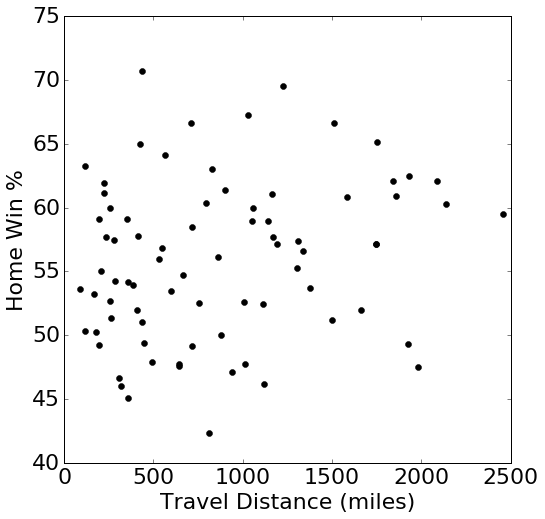

In [11]:
min_games = 40
fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
mpl.rcParams.update({'font.size': 22})
plt.plot(df_rivals[df_rivals['TotalGames'] >= min_games]['Distance'].values, \
         df_rivals[df_rivals['TotalGames'] >= min_games]['HomeWinPer'].values, 'ko')
xlabel('Travel Distance (miles)')
ylabel('Home Win %')
x0 = np.array([1., 0.])
#sigma = np.ones_like(df_rivals[df_rivals['TotalGames'] >= min_games]['Distance'].values)
#fit_rivals = optimization.curve_fit(line, df_rivals[df_rivals['TotalGames'] >= min_games]['Distance'].values, \
#            df_rivals[df_rivals['TotalGames'] >= min_games]['HomeWinPer'].values, x0, sigma)[0]
#plt.plot(df_rivals[df_rivals['TotalGames'] >= min_games]['Distance'].values, \
#         fit_rivals[0] + fit_rivals[1] * df_rivals[df_rivals['TotalGames'] >= min_games]['Distance'].values, \
#         'r-', linewidth=3)

In [16]:
df_rivals[df_rivals['TotalGames'] > 40].sort_values(by='ScoreDiff', ascending=False)

,Team1,Team2,TotalGames,Distance,ScoreDiff,HomeWinPer
226,Chicago Bears,San Francisco 49ers,64,1859.677585,6.640625,60.937500
495,Kansas City Chiefs,Seattle Seahawks,51,1512.047879,5.843137,66.666667
534,Miami Dolphins,New England Patriots,92,1227.662237,5.771739,69.565217
150,Buffalo Bills,Indianapolis Colts,41,436.412780,5.658537,70.731707
382,Green Bay Packers,Los Angeles Rams,66,1752.646602,5.651515,65.151515
344,Denver Broncos,Seattle Seahawks,55,1030.473679,4.909091,67.272727
560,Minnesota Vikings,San Francisco 49ers,46,1585.914959,4.695652,60.869565
390,Green Bay Packers,Philadelphia Eagles,42,709.359490,4.547619,66.666667
239,Cincinnati Bengals,Houston Oilers,57,897.970154,4.543860,61.403509
342,Denver Broncos,San Diego Chargers,111,827.936260,4.495495,63.063063
